#### Q1. In order to predict house price based on several characteristics, such as location, square footage, number of bedrooms, etc., you are developing an SVM regression model. Which regression metric in this situation would be the best to employ?

In [1]:
import pandas as pd

In [215]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [216]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [121]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [217]:
df.shape

(13320, 9)

## EDA And Feature Engineering

In [218]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Since there is only one record having null value in location feature therfore we can drop that record

In [219]:
df.dropna(subset=['location'],inplace=True)

In [220]:
df.shape

(13319, 9)

In [221]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [222]:
df.dropna(subset=['size'],inplace=True)

In [223]:
df.shape

(13303, 9)

In [224]:
df['size'] = df['size'].apply(lambda x : int(x.split(' ')[0]))

In [225]:
df.shape

(13303, 9)

In [226]:
df.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [227]:
df.drop(['society'],axis=1,inplace=True)

In [228]:
df.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath             57
balcony         593
price             0
dtype: int64

In [229]:
len(df)

13303

In [177]:
df['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13303, dtype: object

In [230]:
df.drop(df.loc[df['total_sqft'].str.contains('Perch|Sq. Meter|Sq. Yards|Guntha|Cents|Acres|Grounds')].index,inplace=True)

In [231]:
df.loc[df['total_sqft'].str.contains('-')]

,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3,1804 - 2273,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2,1200 - 1470,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1,1020 - 1130,NaN,NaN,52.570
13265,Super built-up Area,20-Sep,Hoodi,2,1133 - 1384,2.0,0.0,59.135


In [232]:
df.shape

(13257, 8)

In [380]:
def average_value(x):
    parts=x.split('-')
    if len(parts)==2:
        return (float(parts[0])+float(parts[1]))/2
    else:
        return float(x)

In [381]:
df['total_sqft']=df['total_sqft'].apply(average_value)

In [242]:
df.drop(['availability'],inplace=True,axis=1)

In [243]:
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4,3600,5.0,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4,4689,4.0,1.0,488.00


In [244]:
df.shape

(13257, 7)

## Balcony

In [290]:
mode=df.balcony.mode()
mode

0    2.0
Name: balcony, dtype: float64

In [294]:
 from sklearn.impute import SimpleImputer

In [295]:
imp=SimpleImputer(strategy='most_frequent')

In [303]:
df['balcony']=imp.fit_transform(df[['balcony']])

In [304]:
df.isnull().sum()

area_type      0
location       0
size           0
total_sqft     0
bath          57
balcony        0
price          0
dtype: int64

### Bathroom

In [309]:
df['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [310]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

We can observe there are houses which have more bathrooms than the number of rooms in the hous.So we will drop those records.

In [311]:
df = df[df['bath'] <= df['size']]
df.shape

(12300, 7)

### Location

In [269]:
location_count=df.groupby(['location'])['location'].agg('count').sort_values(ascending=False)

In [270]:
location_count

location
Whitefield             537
Sarjapur  Road         397
Electronic City        302
Kanakpura Road         271
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1298, dtype: int64

In [272]:
len(location_count[location_count<=10])

1058

In [273]:
location_count_less_than_10=location_count[location_count<=10]

In [274]:
df['location']=df['location'].apply(lambda x:'other' if x in location_count_less_than_10 else x)

0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
5                  Whitefield
6            Old Airport Road
7                Rajaji Nagar
8                Marathahalli
9                       other
Name: location, dtype: object

In [312]:
df.head(10)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00
5,Super built-up Area,Whitefield,2,1170,2.0,1.0,38.00
6,Super built-up Area,Old Airport Road,4,2732,4.0,2.0,204.00
7,Super built-up Area,Rajaji Nagar,4,3300,4.0,2.0,600.00
8,Super built-up Area,Marathahalli,3,1310,3.0,1.0,63.25
9,Plot Area,other,6,1020,6.0,2.0,370.00
10,Super built-up Area,Whitefield,3,1800,2.0,2.0,70.00


In [277]:
df.location.nunique()

241

In [329]:
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00
5,Super built-up Area,Whitefield,2,1170,2.0,1.0,38.00
...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3,1715,3.0,3.0,112.00
13315,Built-up Area,Whitefield,5,3453,4.0,0.0,231.00
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4,4689,4.0,1.0,488.00


In [192]:
from sklearn.preprocessing import OneHotEncoder

In [313]:
encoder=OneHotEncoder()

In [365]:
enc=pd.DataFrame(encoder.fit_transform(df[['area_type']]).toarray(),columns=
                encoder.get_feature_names_out())

In [366]:
enc

,area_type_Built-upArea,area_type_CarpetArea,area_type_PlotArea,area_type_Superbuilt-upArea
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
12295,0.0,0.0,0.0,1.0
12296,1.0,0.0,0.0,0.0
12297,1.0,0.0,0.0,0.0
12298,0.0,0.0,0.0,1.0


In [367]:
df.shape

(12300, 7)

In [368]:
enc.shape

(12300, 4)

In [369]:
new_df=pd.concat([df,enc],axis=1)

In [371]:
new_df.shape

(13243, 11)

In [372]:
new_df.dropna()

,area_type,location,size,total_sqft,bath,balcony,price,area_type_Built-upArea,area_type_CarpetArea,area_type_PlotArea,area_type_Superbuilt-upArea
0,Superbuilt-upArea,Electronic City Phase II,2.0,1056,2.0,1.0,39.07,0.0,0.0,0.0,1.0
2,Built-upArea,Uttarahalli,3.0,1440,2.0,3.0,62.00,0.0,0.0,0.0,1.0
3,Superbuilt-upArea,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00,0.0,0.0,0.0,1.0
4,Superbuilt-upArea,Kothanur,2.0,1200,2.0,1.0,51.00,0.0,0.0,0.0,1.0
5,Superbuilt-upArea,Whitefield,2.0,1170,2.0,1.0,38.00,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12295,Superbuilt-upArea,Bannerghatta Road,3.0,1660,3.0,3.0,80.00,0.0,0.0,0.0,1.0
12296,Superbuilt-upArea,Uttarahalli,3.0,1330,2.0,1.0,57.00,1.0,0.0,0.0,0.0
12297,Superbuilt-upArea,Old Madras Road,2.0,1165,2.0,1.0,52.00,1.0,0.0,0.0,0.0
12298,Superbuilt-upArea,Budigere,2.0,1153,2.0,2.0,56.00,0.0,0.0,0.0,1.0


In [334]:
new_df.shape

(13243, 252)

In [340]:
df.loc[13317]

area_type            Built-up  Area
location      Raja Rajeshwari Nagar
size                              2
total_sqft                     1141
bath                            2.0
balcony                         1.0
price                          60.0
Name: 13317, dtype: object

In [343]:
df.area_type.unique()

array(['Super built-up  Area', 'Built-up  Area', 'Plot  Area',
       'Carpet  Area'], dtype=object)

In [356]:
df['area_type']=df['area_type'].str.replace(' ','')

C:\Users\utkar\AppData\Local\Temp\ipykernel_19932\1278385666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_type']=df['area_type'].str.replace(' ','')


In [357]:
df.area_type.unique()

array(['Superbuilt-upArea', 'Built-upArea', 'PlotArea', 'CarpetArea'],
      dtype=object)

In [373]:
df=pd.get_dummies(df,columns=['area_type'])

In [374]:
df

,location,size,total_sqft,bath,balcony,price,area_type_Built-upArea,area_type_CarpetArea,area_type_PlotArea,area_type_Superbuilt-upArea
0,Electronic City Phase II,2,1056,2.0,1.0,39.07,0,0,0,1
2,Uttarahalli,3,1440,2.0,3.0,62.00,1,0,0,0
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00,0,0,0,1
4,Kothanur,2,1200,2.0,1.0,51.00,0,0,0,1
5,Whitefield,2,1170,2.0,1.0,38.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3,1715,3.0,3.0,112.00,0,0,0,1
13315,Whitefield,5,3453,4.0,0.0,231.00,1,0,0,0
13317,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00,1,0,0,0
13318,Padmanabhanagar,4,4689,4.0,1.0,488.00,0,0,0,1


In [375]:
df=pd.get_dummies(df,columns=['location'])

In [376]:
df

,size,total_sqft,bath,balcony,price,area_type_Built-upArea,area_type_CarpetArea,area_type_PlotArea,area_type_Superbuilt-upArea,location_ Devarachikkanahalli,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2,1056,2.0,1.0,39.07,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1440,2.0,3.0,62.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1521,3.0,1.0,95.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1200,2.0,1.0,51.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,2,1170,2.0,1.0,38.00,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,3,1715,3.0,3.0,112.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13315,5,3453,4.0,0.0,231.00,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13317,2,1141,2.0,1.0,60.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4,4689,4.0,1.0,488.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

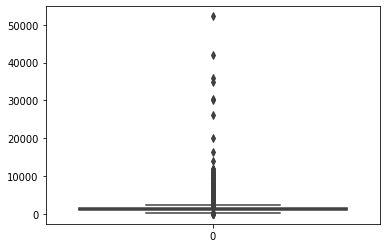

In [383]:
import seaborn as sns
sns.boxplot(data=df['total_sqft'])

In [391]:
Q1=df['total_sqft'].quantile(0.25)
Q3=df['total_sqft'].quantile(0.75)
IQR=Q3-Q1
up=Q3+1.5*IQR
lower=Q1-1.5*IQR
df = df[(df['total_sqft']<=up) & (df['total_sqft']>=lower)]

In [403]:
df['price_per_sqft'] = (df['price']*100000)/df['total_sqft']

C:\Users\utkar\AppData\Local\Temp\ipykernel_19932\4244324591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = (df['price']*100000)/df['total_sqft']


In [404]:
df.head()

,size,total_sqft,bath,balcony,price,area_type_Built-upArea,area_type_CarpetArea,area_type_PlotArea,area_type_Superbuilt-upArea,location_ Devarachikkanahalli,...,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other,price_per_sqft
0,2,1056.0,2.0,1.0,39.07,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3699.810606
2,3,1440.0,2.0,3.0,62.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4305.555556
3,3,1521.0,3.0,1.0,95.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6245.890861
4,2,1200.0,2.0,1.0,51.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4250.000000
5,2,1170.0,2.0,1.0,38.00,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,3247.863248


<AxesSubplot:>

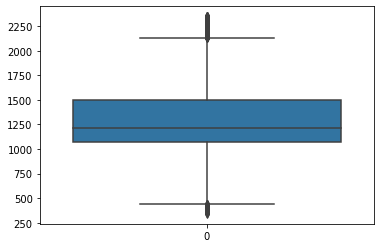

In [392]:
sns.boxplot(data=df['total_sqft'])

In [394]:
X=df.drop('price',axis=1)
y=df['price']

In [393]:
from sklearn.model_selection import train_test_split

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [397]:
X_train.shape

(7518, 249)

In [398]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [399]:
models={'linear regression':LinearRegression(),
       'svr':SVR(),
       'Random Forest':RandomForestRegressor()}

In [400]:
from sklearn.metrics import r2_score

In [410]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
    report={}
    mae=[]
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(X_train,y_train)
        
        y_test_pred=model.predict(X_test)
        
        test_model_score=r2_score(y_test,y_test_pred)
        ma=mean_absolute_error(y_test_pred,y_test)
        mae.append(ma)
        
        report[list(models.keys())[i]]=test_model_score
    return report,mae

In [411]:
evaluate_model(X_train,y_train,X_test,y_test,models)

({'linear regression': 0.562432668982172,
  'svr': 0.21746792958117356,
  'Random Forest': 0.5368163535152686},
 [21.056883251830566, 25.173282622567513, 18.728748176438575])

In [405]:
from sklearn.metrics import mean_absolute_error

For predicting house price based on several characteristics, one possible metric to use is the mean absolute error (MAE). This metric calculates the average of the absolute differences between the actual and predicted values. It is easy to interpret and less sensitive to outliers than MSE or RMSE. MAE can also be used to compare the performance of different regression models on the same data.

#### Q2. You have built an SVM regression model and are trying to decide between using MSE or R-squared as your evaluation metric. Which metric would be more appropriate if your goal is to predict the actual price of a house as accurately as possible?


If your goal is to predict the actual price of a house as accurately as possible, then the Mean Squared Error (MSE) metric would be more appropriate than the R-squared metric.

MSE is a measure of how close the predicted values are to the actual values. It is calculated as the average squared difference between the predicted and actual values. MSE is sensitive to outliers, but it is a good measure of overall accuracy.

#### Q3. You have a dataset with a significant number of outliers and are trying to select an appropriate regression metric to use with your SVM model. Which metric would be the most appropriate in this scenario?

The most appropriate regression metric to use with an SVM model when you have a dataset with a significant number of outliers is Mean Absolute Error (MAE).

MAE is a robust metric that is not sensitive to outliers. It is calculated as the average absolute difference between the predicted and actual values. This makes it a good choice for evaluating the performance of regression models on real-world data, which often contains outliers.

#### Q4. You have built an SVM regression model using a polynomial kernel and are trying to select the best metric to evaluate its performance. You have calculated both MSE and RMSE and found that both values are very close. Which metric should you choose to use in this case?

If we have calculated both MSE and RMSE and found that both values are very close, it means that your model has a low error rate and a good fit to the data.So in this case we can use any of the metrics.

#### Q5. You are comparing the performance of different SVM regression models using different kernels (linear, polynomial, and RBF) and are trying to select the best evaluation metric. Which metric would be most appropriate if your goal is to measure how well the model explains the variance in the target variable?

The best evaluation metric to use for measuring how well an SVM regression model explains the variance in the target variable is R-squared.

R-squared is a measure of how well the model fits the data. It is calculated as the proportion of the variance in the target variable that is explained by the model. A higher R-squared value indicates a better fit.